#Домашнее задание к лекции №2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

Подготовим датасет:

In [ ]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
X_st = X.copy().astype(np.float64)
def calc_std_feat(x):
    s = (x - x.mean()) / x.std()
    return s
for i in range(1, len(X_st)):
  X_st[i] = calc_std_feat(X_st[i])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

##1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [ ]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        '''if i % (iterations / 10) == 0:
            print(i, W, err)'''
    return W

In [ ]:
x = [[],[],[],[]]
for l in np.arange(0.1,100,0.1):
  w = eval_model_reg2(X_st, y, iterations=100, alpha=1e-4, lambda_=l)
  for i in range(len(w)):
    x[i].append(w[i])

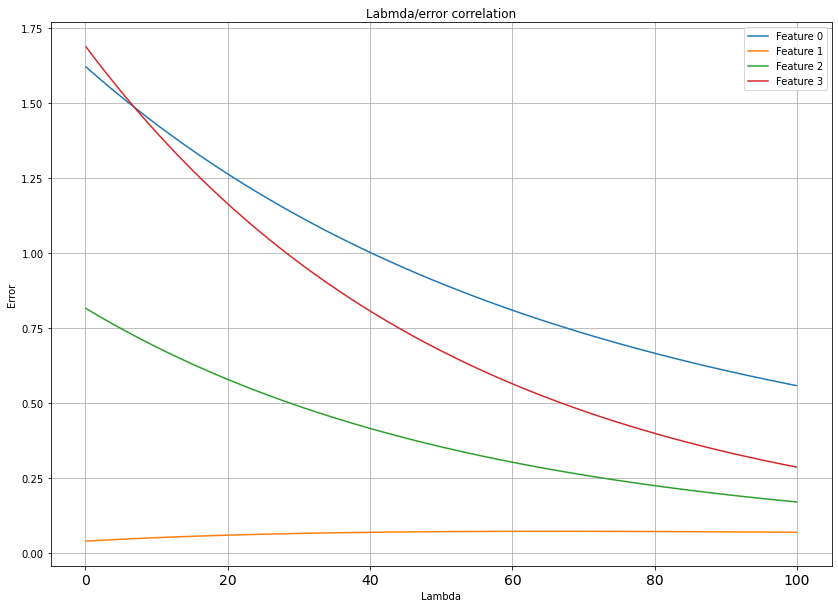

In [ ]:
fig = plt.figure(figsize=(14, 10))

for i in range(len(x)):
  plt.plot(np.arange(0.1,100,0.1), x[i], label=f'Feature {i}')
plt.title('Labmda/error correlation')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

##2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

###Для начала, реализуем функцию нормализации:

In [ ]:
def calc_norm_feat(x):
  X_norm = x.copy().astype(np.float64) 
  for i in range(1, len(X_norm)):
    for j in range(len(X_norm[i])):
      X_norm[i][j] = (x[i][j]-min(x[i]))/(max(x[i])-min(x[i]))
  return X_norm

###И немного оптимизируем функцию стандартизации из урока:

In [ ]:
def calc_std_feat(x):
  X_st = x.copy().astype(np.float64) 
  for i in range(1, len(X_st)):
    for j in range(len(X_st[i])):
      X_st[i][j] = (x[i][j]-x[i].mean())/x[i].std()
  return X_st

In [ ]:
X_norm = calc_norm_feat(X)
X_st = calc_std_feat(X)
print(f'Norm: {X_norm}\n Std: {X_st}')

Norm: [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.1        0.1        0.2        0.1        0.3        0.
  0.5        1.         0.1        0.2       ]
 [0.03225806 0.16129032 0.19354839 0.09677419 0.64516129 0.22580645
  0.67741935 1.         0.         0.35483871]
 [0.         0.         0.5        0.         0.5        0.
  1.         1.         0.         0.5       ]]
 Std: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [-0.57142857 -0.57142857 -0.21428571 -0.57142857  0.14285714 -0.92857143
   0.85714286  2.64285714 -0.57142857 -0.21428571]
 [-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
   1.08270439  2.11385144 -1.08270439  0.05155735]
 [-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
   1.66447944  1.66447944 -0.89625816  0.38411064]]


In [ ]:
X_norm_st = calc_norm_feat(calc_std_feat(X))
X_norm_st

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

###В коде ниже видно, что стандартизация нормализвонных признаков даёт тот же результат, что и стандартизация исходной выборки.

In [ ]:
X_norm = calc_norm_feat(X)
X_st = calc_std_feat(X)
X_st_norm = calc_std_feat(X_norm)
print(f'{X_st} \n{X_st_norm}')
print(f'Разность векторов: {round(np.linalg.norm(X_st-X_st_norm))}')

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [-0.57142857 -0.57142857 -0.21428571 -0.57142857  0.14285714 -0.92857143
   0.85714286  2.64285714 -0.57142857 -0.21428571]
 [-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
   1.08270439  2.11385144 -1.08270439  0.05155735]
 [-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
   1.66447944  1.66447944 -0.89625816  0.38411064]] 
[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [-0.57142857 -0.57142857 -0.21428571 -0.57142857  0.14285714 -0.92857143
   0.85714286  2.64285714 -0.57142857 -0.21428571]
 [-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
   1.08270439  2.11385144 -1.08270439  0.05155735]
 [-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
   1.66447944  1.66447944 -0.89625816  0.38411064]]
Разность вект

###То же справедливо и для обратоной операции:

In [ ]:
X_norm = calc_norm_feat(X)
X_st = calc_std_feat(X)
X_norm_st = calc_norm_feat(X_st)
print(f'{X_norm} \n{X_norm_st}')
print(f'Разность векторов: {round(np.linalg.norm(X_norm-X_norm_st))}')

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.1        0.1        0.2        0.1        0.3        0.
  0.5        1.         0.1        0.2       ]
 [0.03225806 0.16129032 0.19354839 0.09677419 0.64516129 0.22580645
  0.67741935 1.         0.         0.35483871]
 [0.         0.         0.5        0.         0.5        0.
  1.         1.         0.         0.5       ]] 
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.1        0.1        0.2        0.1        0.3        0.
  0.5        1.         0.1        0.2       ]
 [0.03225806 0.16129032 0.19354839 0.09677419 0.64516129 0.22580645
  0.67741935 1.         0.         0.35483871]
 [0.         0.         0.5        0.         0.5        0.
  1.         1.         0.         0.5       ]]
Разность векторов: 0


###Пришел к выводу, что т.к. оба метода масштабировния приводят к результату не меняя вида распределения, то дальнейшие манипуляции приводят к значениям с тем же распределением $X_{st}(X) = X_{st}(X_{norm})$.

#3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [ ]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_* W) 
        '''if i % (iterations / 10) == 0:
            print(i, W, err)'''
    return W